## Tutorial para usar MLflow UI

## 🚀 Cómo usar MLflow UI

Para visualizar todos los experimentos en la interfaz web de MLflow:

### 1. Abrir terminal/PowerShell
```bash
# En la carpeta del proyecto
mlflow ui
```

### 2. Abrir navegador
Ve a: http://localhost:5000

### 3. Explorar experimentos
- 📊 Ver todos los runs y métricas
- 📈 Comparar modelos lado a lado
- 📁 Descargar artefactos (gráficos, modelos)
- 🔍 Filtrar y ordenar resultados
- 📝 Agregar notas y tags

### 4. Funcionalidades útiles
- **Compare runs**: Seleccionar múltiples runs para comparar
- **Parallel coordinates**: Visualizar relaciones entre parámetros y métricas
- **Scatter plots**: Gráficos de dispersión de métricas
- **Model registry**: Registrar los mejores modelos

### 5. En Docker
```powershell
# Si usas Docker
.\docker-helper.ps1 shell
# Dentro del contenedor:
mlflow ui --host 0.0.0.0 --port 5000
```

## Próximos pasos

### 🎯 Sugerencias para experimentar más:

1. **Más datasets**: Probar con `loan_data.csv` completo
2. **Feature engineering**: Crear nuevas características
3. **Más modelos**: XGBoost, LightGBM, Neural Networks
4. **Hyperparameter tuning**: Grid search, Random search
5. **Ensemble methods**: Voting, Stacking
6. **Cross-validation**: Más estrategias de validación
7. **Model registry**: Registrar modelos en producción
8. **A/B testing**: Comparar modelos en producción

### 📚 Recursos adicionales:
- [MLflow Documentation](https://mlflow.org/docs/latest/index.html)
- [MLflow Examples](https://github.com/mlflow/mlflow/tree/master/examples)
- [MLflow Tutorials](https://mlflow.org/docs/latest/tutorials-and-examples/index.html)

In [1]:
from mlflow.tracking import MlflowClient
#Que store de mklflow estoy usando 
import mlflow, os
print("mlflow.get_tracking_uri():", mlflow.get_tracking_uri())
print("MLFLOW_TRACKING_URI env:", os.environ.get("MLFLOW_TRACKING_URI"))

#Import MLflow utils 
from ds_utils import MLflowUtils

mlflow_uri = "http://127.0.0.1:5000"
mlflow_experiment = "Iris Species Classification"

mlflow_utils = MLflowUtils()
mlflow_utils.init_mlflow(mlflow_uri, mlflow_experiment)



mlflow.get_tracking_uri(): file:///C:/Users/sergiosal/source/repos/DataScienceVSCode/notebooks/mlflow_experiments/mlruns
MLFLOW_TRACKING_URI env: None
Create or use experiment: Iris Species Classification


In [9]:
# Limpiar archivos temporales
import os
import glob

# Eliminar archivos de imágenes temporales
for file in glob.glob("*.png"):
    try:
        os.remove(file)
    except:
        pass

for file in glob.glob("*.txt"):
    try:
        os.remove(file)
    except:
        pass

print("🧹 Archivos temporales limpiados")
print("\n✅ ¡Notebook completado!")
print("🚀 Ejecuta 'mlflow ui' en terminal para explorar los resultados")

🧹 Archivos temporales limpiados

✅ ¡Notebook completado!
🚀 Ejecuta 'mlflow ui' en terminal para explorar los resultados


# Ejemplo clásico: Dataset Iris

Ahora vamos a demostrar MLflow con el famoso dataset Iris, un ejemplo clásico de clasificación multiclase en machine learning.

## Sobre el dataset Iris:
- **150 muestras** de flores iris
- **4 características**: longitud y ancho de sépalo y pétalo
- **3 clases**: Iris-setosa, Iris-versicolor, Iris-virginica
- **Problema**: Clasificación multiclase
- **Objetivo**: Predecir la especie de iris basándose en las medidas florales

In [2]:
# Cargar dataset Iris
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Cargar datos
# iris = load_iris()
# X_iris = iris.data
# y_iris = iris.target
diabetes_df = pd.read_csv('./data/diabetes_prediction_dataset.csv')
target_col = 'diabetes'
target_names = diabetes_df[target_col].unique()
print(f'target_names: {target_names}')

# Crear DataFrame para mejor visualización
#iris_df = pd.DataFrame(X_iris, columns=iris.feature_names)
#iris_df['species_name'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("🌸 Dataset Diabetes cargado exitosamente")
print(f"📊 Forma del dataset: {diabetes_df.shape}")
print(f"🏷️ Características: {list(diabetes_df.columns)}")
print(f"🎯 Clases: {list(iris.target_names)}")
print(f"📈 Distribución de clases: {pd.Series(target_col).value_counts().sort_index().to_dict()}")

# Mostrar primeras filas
print("\n📋 Primeras 5 filas del dataset:")
display(diabetes_df.head(5))


target_names: [0 1]
🌸 Dataset Diabetes cargado exitosamente
📊 Forma del dataset: (100000, 9)
🏷️ Características: ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']


NameError: name 'iris' is not defined

## EDA Detallado

In [15]:
import ds_utils
from ds_utils.eda import generate_full_report


generate_full_report(iris_df, target_col = "species", 
           name="Dataset", correlation_threshold= 0.7)



ModuleNotFoundError: No module named 'ds_utils'

## Preparación de datos Diabetes para MLflow

In [6]:
def train_and_log_iris_model(model, model_name, X_train, X_test, y_train, y_test, params=None):
    """
    Entrena un modelo multiclase para Iris y registra métricas en MLflow
    """
    with mlflow.start_run(run_name=f"Iris - {model_name}"):
        # Registrar parámetros
        mlflow.log_param("model_type", model_name)
        mlflow.log_param("dataset", "Iris")
        mlflow.log_param("problem_type", "multiclass_classification")
        mlflow.log_param("n_classes", 3)
        mlflow.log_param("train_samples", len(X_train))
        mlflow.log_param("test_samples", len(X_test))
        mlflow.log_param("n_features", X_train.shape[1])
        
        if params:
            for key, value in params.items():
                mlflow.log_param(key, value)
        
        # Entrenar modelo
        model.fit(X_train, y_train)
        
        # Predicciones
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None
        
        # Calcular métricas
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Métricas por clase
        precision_macro = precision_score(y_test, y_pred, average='macro')
        recall_macro = recall_score(y_test, y_pred, average='macro')
        f1_macro = f1_score(y_test, y_pred, average='macro')
        
        # Registrar métricas
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision_weighted", precision)
        mlflow.log_metric("recall_weighted", recall)
        mlflow.log_metric("f1_weighted", f1)
        mlflow.log_metric("precision_macro", precision_macro)
        mlflow.log_metric("recall_macro", recall_macro)
        mlflow.log_metric("f1_macro", f1_macro)
        
        # AUC multiclase (One-vs-Rest)
        if y_pred_proba is not None:
            auc_ovr = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
            auc_ovo = roc_auc_score(y_test, y_pred_proba, multi_class='ovo')
            mlflow.log_metric("auc_ovr", auc_ovr)
            mlflow.log_metric("auc_ovo", auc_ovo)
        
        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        mlflow.log_metric("cv_mean", cv_scores.mean())
        mlflow.log_metric("cv_std", cv_scores.std())
        
        # Registrar modelo
        mlflow.sklearn.log_model(model, "model")
        
        # Matriz de confusión
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                   xticklabels=iris.target_names, yticklabels=iris.target_names)
        plt.title(f'Matriz de Confusión - {model_name} (Iris)')
        plt.xlabel('Predicción')
        plt.ylabel('Actual')
        plt.tight_layout()
        
        # Guardar gráfico
        confusion_file = f"iris_confusion_matrix_{model_name.replace(' ', '_')}.png"
        plt.savefig(confusion_file)
        mlflow.log_artifact(confusion_file)
        plt.show()
        
        # Reporte de clasificación
        report = classification_report(y_test, y_pred, target_names=iris.target_names)
        report_file = f"iris_classification_report_{model_name.replace(' ', '_')}.txt"
        with open(report_file, "w") as f:
            f.write(report)
        mlflow.log_artifact(report_file)
        
        print(f"🌸 {model_name} entrenado en dataset Iris")
        print(f"📊 Accuracy: {accuracy:.4f}")
        print(f"📊 F1-Score (weighted): {f1:.4f}")
        print(f"📊 F1-Score (macro): {f1_macro:.4f}")
        if y_pred_proba is not None:
            print(f"📊 AUC (OvR): {auc_ovr:.4f}")
            print(f"📊 AUC (OvO): {auc_ovo:.4f}")
        print(f"📊 CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
        print("-" * 60)
        
        return model

In [7]:
from sklearn.model_selection import train_test_split


# Preparar datos Iris para machine learning
X_iris = iris.data
y_iris = iris.target

print('X_iris:')
display(X_iris[:5])
print('y_iris:')
display(y_iris[:5])


# División train/test
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42, stratify=y_iris
)

print('X_train_iris:')
display(X_train_iris[:5])
print('X_test_iris:')
display(X_test_iris[:5])


# Escalado de características
scaler_iris = StandardScaler()
X_train_iris_scaled = scaler_iris.fit_transform(X_train_iris)
X_test_iris_scaled = scaler_iris.transform(X_test_iris)

print('X_train_iris_scaled:')
display(X_train_iris_scaled[:5])
print('X_test_iris_scaled:')
display(X_test_iris_scaled[:5])

print(f"🌸 Datos Iris preparados:")
print(f"📊 Entrenamiento: {X_train_iris.shape[0]} muestras")
print(f"📊 Prueba: {X_test_iris.shape[0]} muestras") 
print(f"🏷️ Características: {iris.feature_names}")
print(f"🎯 Clases: {iris.target_names}")

# Crear nuevo experimento para Iris
iris_experiment_name = "Iris Species Classification"
mlflow.set_experiment(iris_experiment_name)

iris_experiment = mlflow.get_experiment_by_name(iris_experiment_name)
print(f"\n🔬 Experimento Iris creado: {iris_experiment.name}")
print(f"📁 Experiment ID: {iris_experiment.experiment_id}")


X_iris:


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

y_iris:


array([0, 0, 0, 0, 0])

X_train_iris:


array([[4.4, 2.9, 1.4, 0.2],
       [4.9, 2.5, 4.5, 1.7],
       [6.8, 2.8, 4.8, 1.4],
       [4.9, 3.1, 1.5, 0.1],
       [5.5, 2.5, 4. , 1.3]])

X_test_iris:


array([[4.4, 3. , 1.3, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [4.9, 2.4, 3.3, 1. ],
       [5. , 2.3, 3.3, 1. ],
       [4.4, 3.2, 1.3, 0.2]])

X_train_iris_scaled:


array([[-1.72156775, -0.33210111, -1.34572231, -1.32327558],
       [-1.12449223, -1.22765467,  0.41450518,  0.6517626 ],
       [ 1.14439475, -0.5559895 ,  0.58484978,  0.25675496],
       [-1.12449223,  0.11567567, -1.28894078, -1.45494479],
       [-0.40800161, -1.22765467,  0.13059752,  0.12508575]])

X_test_iris_scaled:


array([[-1.72156775, -0.10821272, -1.40250384, -1.32327558],
       [ 0.30848902, -0.10821272,  0.64163131,  0.78343181],
       [-1.12449223, -1.45154306, -0.2668732 , -0.26992188],
       [-1.00507713, -1.67543145, -0.2668732 , -0.26992188],
       [-1.72156775,  0.33956406, -1.40250384, -1.32327558]])

🌸 Datos Iris preparados:
📊 Entrenamiento: 120 muestras
📊 Prueba: 30 muestras
🏷️ Características: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
🎯 Clases: ['setosa' 'versicolor' 'virginica']

🔬 Experimento Iris creado: Iris Species Classification
📁 Experiment ID: 4


## Entrenar múltiples modelos con Iris

Vamos a probar diferentes algoritmos de machine learning con el dataset Iris para comparar su rendimiento en clasificación multiclase.

🚀 Iniciando entrenamiento de modelos con dataset Iris...

<class 'numpy.ndarray'>
🔄 Entrenando Logistic Regression con Iris...


2025/08/12 02:41:01 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/12 02:41:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


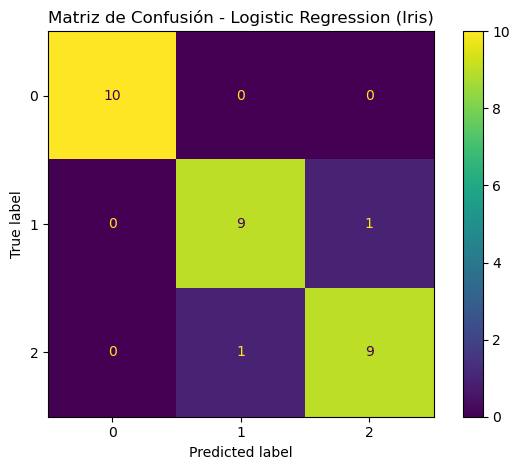

🌸 Logistic Regression entrenado en dataset Iris
📊 Accuracy: 0.9333
📊 F1-Score (weighted): 0.9333
📊 F1-Score (macro): 0.9333
📊 CV Score: 0.9583 (+/- 0.0527)
------------------------------------------------------------
🏃 View run Iris - Logistic Regression at: http://127.0.0.1:5000/#/experiments/4/runs/b5db788a7b234c93a271df3408788f95
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/4
🔄 Entrenando Random Forest con Iris...


2025/08/12 02:41:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/12 02:41:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


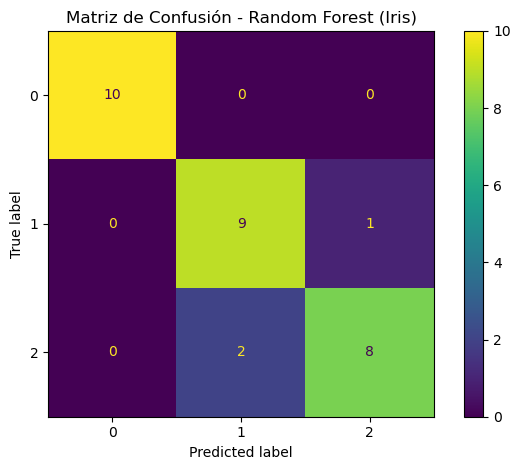

🌸 Random Forest entrenado en dataset Iris
📊 Accuracy: 0.9000
📊 F1-Score (weighted): 0.8997
📊 F1-Score (macro): 0.8997
📊 CV Score: 0.9500 (+/- 0.0333)
------------------------------------------------------------
🏃 View run Iris - Random Forest at: http://127.0.0.1:5000/#/experiments/4/runs/80838ffc25834f1ebc814ebd92f9e452
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/4
🔄 Entrenando Support Vector Machine con Iris...


2025/08/12 02:41:11 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/12 02:41:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


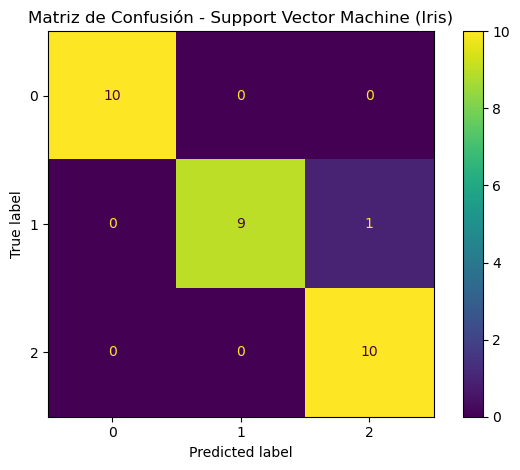

🌸 Support Vector Machine entrenado en dataset Iris
📊 Accuracy: 0.9667
📊 F1-Score (weighted): 0.9666
📊 F1-Score (macro): 0.9666
📊 CV Score: 0.9667 (+/- 0.0624)
------------------------------------------------------------
🏃 View run Iris - Support Vector Machine at: http://127.0.0.1:5000/#/experiments/4/runs/af2a9751541f4ce889c7a4c4ffd510fe
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/4
🔄 Entrenando Naive Bayes con Iris...


2025/08/12 02:41:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/12 02:41:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


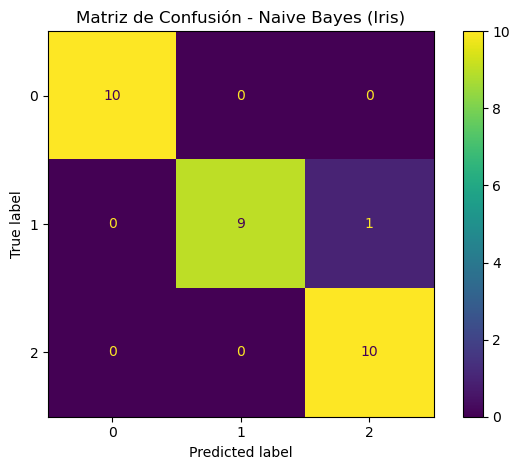

🌸 Naive Bayes entrenado en dataset Iris
📊 Accuracy: 0.9667
📊 F1-Score (weighted): 0.9666
📊 F1-Score (macro): 0.9666
📊 CV Score: 0.9583 (+/- 0.0527)
------------------------------------------------------------
🏃 View run Iris - Naive Bayes at: http://127.0.0.1:5000/#/experiments/4/runs/2528f4108de64455bc09c720bc9248d8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/4
🔄 Entrenando Decision Tree con Iris...


2025/08/12 02:41:18 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/12 02:41:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


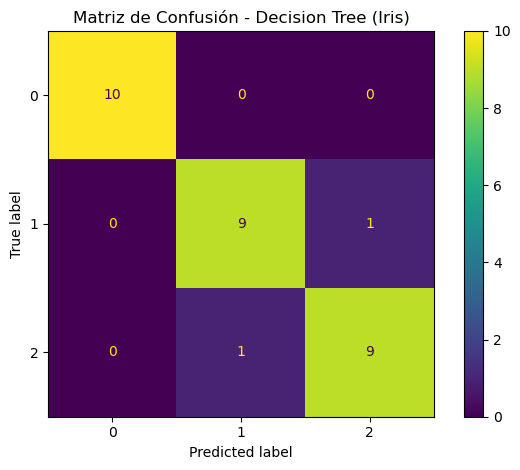

🌸 Decision Tree entrenado en dataset Iris
📊 Accuracy: 0.9333
📊 F1-Score (weighted): 0.9333
📊 F1-Score (macro): 0.9333
📊 CV Score: 0.9417 (+/- 0.0408)
------------------------------------------------------------
🏃 View run Iris - Decision Tree at: http://127.0.0.1:5000/#/experiments/4/runs/1c7346fc0c7a47e69d5051273b221c2d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/4
🔄 Entrenando K-Nearest Neighbors con Iris...


2025/08/12 02:41:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/12 02:41:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


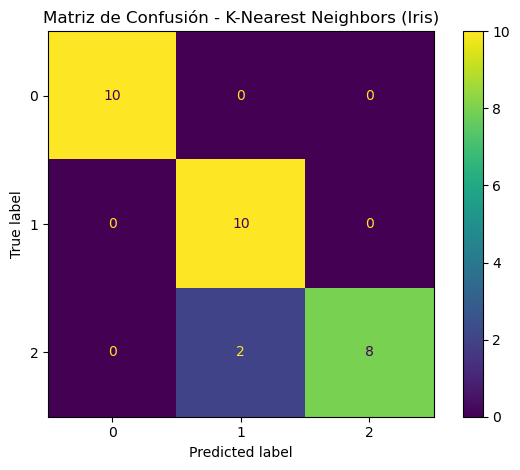

🌸 K-Nearest Neighbors entrenado en dataset Iris
📊 Accuracy: 0.9333
📊 F1-Score (weighted): 0.9327
📊 F1-Score (macro): 0.9327
📊 CV Score: 0.9667 (+/- 0.0624)
------------------------------------------------------------
🏃 View run Iris - K-Nearest Neighbors at: http://127.0.0.1:5000/#/experiments/4/runs/8cc5fa6b885f43be98d3f74f7f1a51aa
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/4
🔄 Entrenando Gradient Boosting con Iris...


2025/08/12 02:41:28 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/12 02:41:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
# Importar modelos adicionales para Iris
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (accuracy_score,
                             log_loss,
                             precision_score,
                             recall_score,
                             f1_score,
                             roc_auc_score,
                             confusion_matrix,
                             classification_report)

# Definir modelos específicos para Iris
iris_models = [
    (LogisticRegression(random_state=42, max_iter=1000), "Logistic Regression", 
     {"C": 1.0, "solver": "liblinear", "multi_class": "ovr"}),
    
    (RandomForestClassifier(random_state=42), "Random Forest", 
     {"n_estimators": 100, "max_depth": None, "min_samples_split": 2}),
    
    (SVC(random_state=42, probability=True), "Support Vector Machine", 
     {"C": 1.0, "kernel": "rbf", "gamma": "scale"}),
    
    (GaussianNB(), "Naive Bayes", {"var_smoothing": 1e-9}),
    
    (DecisionTreeClassifier(random_state=42), "Decision Tree", 
     {"max_depth": None, "min_samples_split": 2, "criterion": "gini"}),
    
    (KNeighborsClassifier(), "K-Nearest Neighbors", 
     {"n_neighbors": 5, "weights": "uniform", "algorithm": "auto"}),
    
    (GradientBoostingClassifier(random_state=42), "Gradient Boosting", 
     {"n_estimators": 100, "learning_rate": 0.1, "max_depth": 3}),
    
    (RidgeClassifier(random_state=42), "Ridge Classifier", 
     {"alpha": 1.0, "solver": "auto"}),

    (DecisionTreeClassifier(random_state=42), "Decision Tree", 
     {"max_depth": None, "min_samples_split": 2})
]

print("🚀 Iniciando entrenamiento de modelos con dataset Iris...\n")

iris_trained_models = {}
targets_str_col_name = 'species_name'

print(type(X_train_iris_scaled))

for model, name, params in iris_models:
    print(f"🔄 Entrenando {name} con Iris...")
    trained_model = mlflow_utils.train_and_log_multiclass_model(
        model=model,
        model_name=name,
        X_train=X_train_iris_scaled,
        X_test=X_test_iris_scaled,
        y_train=y_train_iris,
        y_test=y_test_iris,
        dataset_name="Iris",
        params=params,
        targets_str_col_name=targets_str_col_name
    )
    iris_trained_models[name] = trained_model

print("\n🎉 ¡Todos los modelos Iris han sido entrenados y registrados!")
print(f"📊 Total de modelos entrenados: {len(iris_trained_models)}")
print(f"🔬 Experimento: {iris_experiment_name}")
print(f"🌐 Ver resultados en MLflow UI: http://localhost:5000")

## Analisis de resultados

In [ ]:
# Análisis de resultados Iris


print("🔍 Analizando resultados del experimento Iris...\n")

# Obtener runs del experimento Iris
mlflow_client = MlflowClient()
iris_runs = mlflow_client.search_runs(iris_experiment.experiment_id)

print(f"📊 Total de runs en experimento Iris: {len(iris_runs)}")
print("\n🏆 Resumen de resultados Iris:")
print("=" * 100)

# Crear DataFrame con resultados Iris
iris_results_data = []
for run in iris_runs:
    metrics = run.data.metrics
    params = run.data.params
    
    iris_results_data.append({
        'run_id': run.info.run_id[:8],
        'model_type': params.get('model_type', 'Unknown'),
        'accuracy': metrics.get('accuracy', 0),
        'f1_weighted': metrics.get('f1_weighted', 0),
        'f1_macro': metrics.get('f1_macro', 0),
        'auc_ovr': metrics.get('auc_ovr', 0),
        'auc_ovo': metrics.get('auc_ovo', 0),
        'cv_mean': metrics.get('cv_mean', 0),
        'cv_std': metrics.get('cv_std', 0)
    })

iris_results_df = pd.DataFrame(iris_results_data)
iris_results_df = iris_results_df.sort_values('accuracy', ascending=False)

# Mostrar resultados
print(iris_results_df.round(4).to_string(index=False))

# Mejor modelo Iris
best_iris_model = iris_results_df.iloc[0]
print(f"\n🥇 Mejor modelo Iris: {best_iris_model['model_type']}")
print(f"📊 Accuracy: {best_iris_model['accuracy']:.4f}")
print(f"📊 F1-Score (weighted): {best_iris_model['f1_weighted']:.4f}")
print(f"📊 F1-Score (macro): {best_iris_model['f1_macro']:.4f}")
print(f"📊 AUC (OvR): {best_iris_model['auc_ovr']:.4f}")
print(f"📊 CV Score: {best_iris_model['cv_mean']:.4f} (+/- {best_iris_model['cv_std'] * 2:.4f})")

# Estadísticas del experimento
print(f"\n📈 Estadísticas del experimento Iris:")
print(f"📊 Accuracy promedio: {iris_results_df['accuracy'].mean():.4f}")
print(f"📊 Accuracy máxima: {iris_results_df['accuracy'].max():.4f}")
print(f"📊 Accuracy mínima: {iris_results_df['accuracy'].min():.4f}")
print(f"📊 Desviación estándar: {iris_results_df['accuracy'].std():.4f}")

# Modelos con accuracy perfecta
perfect_models = iris_results_df[iris_results_df['accuracy'] == 1.0]['model_type'].tolist()
if perfect_models:
    print(f"\n🎯 Modelos con accuracy perfecta (100%): {', '.join(perfect_models)}")
else:
    print(f"\n⚠️ Ningún modelo alcanzó accuracy perfecta")

In [ ]:
# Visualizaciones comparativas para Iris
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('🌸 Comparación de Modelos - Dataset Iris', fontsize=16, fontweight='bold')

# 1. Accuracy
axes[0, 0].barh(iris_results_df['model_type'], iris_results_df['accuracy'], color='skyblue')
axes[0, 0].set_xlabel('Accuracy')
axes[0, 0].set_title('Accuracy por Modelo')
axes[0, 0].set_xlim(0, 1)
axes[0, 0].grid(axis='x', alpha=0.3)

# 2. F1-Score Weighted
axes[0, 1].barh(iris_results_df['model_type'], iris_results_df['f1_weighted'], color='lightgreen')
axes[0, 1].set_xlabel('F1-Score (Weighted)')
axes[0, 1].set_title('F1-Score Weighted por Modelo')
axes[0, 1].set_xlim(0, 1)
axes[0, 1].grid(axis='x', alpha=0.3)

# 3. F1-Score Macro
axes[0, 2].barh(iris_results_df['model_type'], iris_results_df['f1_macro'], color='lightcoral')
axes[0, 2].set_xlabel('F1-Score (Macro)')
axes[0, 2].set_title('F1-Score Macro por Modelo')
axes[0, 2].set_xlim(0, 1)
axes[0, 2].grid(axis='x', alpha=0.3)

# 4. AUC OvR
auc_ovr_data = iris_results_df[iris_results_df['auc_ovr'] > 0]
if not auc_ovr_data.empty:
    axes[1, 0].barh(auc_ovr_data['model_type'], auc_ovr_data['auc_ovr'], color='gold')
    axes[1, 0].set_xlabel('AUC (One-vs-Rest)')
    axes[1, 0].set_title('AUC OvR por Modelo')
    axes[1, 0].set_xlim(0, 1)
    axes[1, 0].grid(axis='x', alpha=0.3)
else:
    axes[1, 0].text(0.5, 0.5, 'No hay datos AUC', ha='center', va='center')
    axes[1, 0].set_title('AUC OvR por Modelo')

# 5. Cross-Validation Mean
axes[1, 1].barh(iris_results_df['model_type'], iris_results_df['cv_mean'], color='mediumpurple')
axes[1, 1].set_xlabel('CV Mean Accuracy')
axes[1, 1].set_title('Cross-Validation Mean por Modelo')
axes[1, 1].set_xlim(0, 1)
axes[1, 1].grid(axis='x', alpha=0.3)

# 6. Scatter plot: Accuracy vs F1-Score
scatter = axes[1, 2].scatter(iris_results_df['accuracy'], iris_results_df['f1_weighted'], 
                           s=100, alpha=0.7, c=range(len(iris_results_df)), cmap='viridis')
axes[1, 2].set_xlabel('Accuracy')
axes[1, 2].set_ylabel('F1-Score (Weighted)')
axes[1, 2].set_title('Accuracy vs F1-Score')
axes[1, 2].grid(True, alpha=0.3)

# Añadir etiquetas a los puntos
for i, model in enumerate(iris_results_df['model_type']):
    axes[1, 2].annotate(model.split()[0][:3], 
                       (iris_results_df.iloc[i]['accuracy'], iris_results_df.iloc[i]['f1_weighted']),
                       xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.savefig('iris_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Registrar visualización en MLflow
with mlflow.start_run(run_name="Iris Model Comparison Summary"):
    mlflow.log_artifact('iris_model_comparison.png')
    mlflow.log_metric("total_iris_models", len(iris_results_df))
    mlflow.log_metric("best_iris_accuracy", iris_results_df['accuracy'].max())
    mlflow.log_metric("avg_iris_accuracy", iris_results_df['accuracy'].mean())
    mlflow.log_param("best_iris_model", best_iris_model['model_type'])
    mlflow.log_param("dataset", "Iris")
    mlflow.log_param("problem_type", "multiclass_classification")

print("📊 Visualizaciones guardadas en MLflow")
print("🎯 Resumen registrado como run separado")

## Experimento con hiperparámetros - K-Nearest Neighbors

KNN es particularmente interesante con Iris ya que las especies están bien separadas en el espacio de características. Vamos a experimentar con diferentes valores de K.

In [ ]:
# Experimentar con diferentes configuraciones de KNN para Iris
print("🔬 Experimentando con K-Nearest Neighbors en Iris...\n")

# Diferentes configuraciones de KNN
knn_configs = [
    {"n_neighbors": 1, "weights": "uniform"},
    {"n_neighbors": 3, "weights": "uniform"},
    {"n_neighbors": 5, "weights": "uniform"},
    {"n_neighbors": 7, "weights": "uniform"},
    {"n_neighbors": 9, "weights": "uniform"},
    {"n_neighbors": 3, "weights": "distance"},
    {"n_neighbors": 5, "weights": "distance"},
    {"n_neighbors": 7, "weights": "distance"},
    {"n_neighbors": 11, "weights": "uniform"},
    {"n_neighbors": 15, "weights": "uniform"}
]

knn_results = []

for i, config in enumerate(knn_configs):
    model = KNeighborsClassifier(**config)
    model_name = f"KNN - K={config['n_neighbors']}, weights={config['weights']}"
    
    print(f"🔄 Probando {model_name}...")
    
    # Entrenar y registrar
    trained_model = train_and_log_iris_model(
        model, model_name,
        X_train_iris_scaled, X_test_iris_scaled,
        y_train_iris, y_test_iris, config
    )
    
    # Guardar resultados para análisis
    accuracy = accuracy_score(y_test_iris, trained_model.predict(X_test_iris_scaled))
    knn_results.append({
        'k': config['n_neighbors'],
        'weights': config['weights'],
        'accuracy': accuracy,
        'model_name': model_name
    })

print("\n✅ Experimentos KNN completados!")

# Análisis de resultados KNN
knn_df = pd.DataFrame(knn_results)
print(f"\n📊 Resultados de experimentos KNN:")
print(knn_df.sort_values('accuracy', ascending=False).to_string(index=False))

# Encontrar mejor configuración
best_knn = knn_df.loc[knn_df['accuracy'].idxmax()]
print(f"\n🥇 Mejor configuración KNN:")
print(f"📊 K = {best_knn['k']}, Weights = {best_knn['weights']}")
print(f"📊 Accuracy = {best_knn['accuracy']:.4f}")

# Visualizar resultados KNN
plt.figure(figsize=(12, 8))

# Subplot 1: Accuracy vs K para different weights
plt.subplot(2, 2, 1)
uniform_data = knn_df[knn_df['weights'] == 'uniform']
distance_data = knn_df[knn_df['weights'] == 'distance']

plt.plot(uniform_data['k'], uniform_data['accuracy'], 'o-', label='uniform', linewidth=2, markersize=8)
plt.plot(distance_data['k'], distance_data['accuracy'], 's-', label='distance', linewidth=2, markersize=8)
plt.xlabel('K (número de vecinos)')
plt.ylabel('Accuracy')
plt.title('KNN: Accuracy vs K')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Bar plot de todas las configuraciones
plt.subplot(2, 2, 2)
colors = ['lightblue' if w == 'uniform' else 'lightcoral' for w in knn_df['weights']]
bars = plt.bar(range(len(knn_df)), knn_df['accuracy'], color=colors)
plt.xlabel('Configuración')
plt.ylabel('Accuracy')
plt.title('Accuracy por Configuración KNN')
plt.xticks(range(len(knn_df)), [f"K={row['k']}\n{row['weights']}" for _, row in knn_df.iterrows()], 
           rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Añadir leyenda de colores
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='lightblue', label='uniform'),
                  Patch(facecolor='lightcoral', label='distance')]
plt.legend(handles=legend_elements, title='Weights')

# Subplot 3: Heatmap de accuracy
plt.subplot(2, 2, 3)
pivot_data = knn_df.pivot(index='weights', columns='k', values='accuracy')
sns.heatmap(pivot_data, annot=True, cmap='YlOrRd', fmt='.3f', cbar_kws={'label': 'Accuracy'})
plt.title('Heatmap: Accuracy por K y Weights')
plt.xlabel('K (número de vecinos)')
plt.ylabel('Weights')

# Subplot 4: Box plot comparando weights
plt.subplot(2, 2, 4)
uniform_acc = knn_df[knn_df['weights'] == 'uniform']['accuracy']
distance_acc = knn_df[knn_df['weights'] == 'distance']['accuracy']
plt.boxplot([uniform_acc, distance_acc], labels=['uniform', 'distance'])
plt.ylabel('Accuracy')
plt.title('Distribución de Accuracy por Weights')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('iris_knn_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Registrar análisis KNN en MLflow
with mlflow.start_run(run_name="Iris KNN Hyperparameter Analysis"):
    mlflow.log_artifact('iris_knn_analysis.png')
    mlflow.log_metric("best_knn_accuracy", best_knn['accuracy'])
    mlflow.log_param("best_k", best_knn['k'])
    mlflow.log_param("best_weights", best_knn['weights'])
    mlflow.log_param("total_knn_configs", len(knn_configs))
    mlflow.log_metric("knn_accuracy_mean", knn_df['accuracy'].mean())
    mlflow.log_metric("knn_accuracy_std", knn_df['accuracy'].std())

print("📊 Análisis KNN guardado en MLflow")

## Comparación final: Préstamos vs Iris

Comparemos los resultados obtenidos en ambos datasets para entender las diferencias entre problemas de clasificación binaria y multiclase.

In [ ]:
# Comparación de experimentos: Préstamos vs Iris
print("🔄 Recopilando resultados de ambos experimentos...")

# Obtener runs del experimento de préstamos
loan_experiment = mlflow.get_experiment_by_name("Loan Default Classification")

print(loan_experiment)

if(not loan_experiment):
    print('Unable to load Loan Default Classification experiment')
    

loan_runs = mlflow_client.search_runs(loan_experiment.experiment_id)

# Recopilar datos de préstamos (excluyendo runs de resumen)
loan_data = []
for run in loan_runs:
    if "Summary" not in run.data.tags.get('mlflow.runName', ''):
        metrics = run.data.metrics
        params = run.data.params
        
        loan_data.append({
            'dataset': 'Préstamos',
            'model_type': params.get('model_type', 'Unknown'),
            'accuracy': metrics.get('accuracy', 0),
            'f1_score': metrics.get('f1_score', 0),
            'problem_type': 'Binary Classification'
        })

# Recopilar datos de Iris (excluyendo runs de resumen y KNN específicos)
iris_data = []
for run in iris_runs:
    if "Summary" not in run.data.tags.get('mlflow.runName', '') and "KNN -" not in run.data.tags.get('mlflow.runName', ''):
        metrics = run.data.metrics
        params = run.data.params
        
        iris_data.append({
            'dataset': 'Iris',
            'model_type': params.get('model_type', 'Unknown'),
            'accuracy': metrics.get('accuracy', 0),
            'f1_score': metrics.get('f1_weighted', 0),  # Usar f1_weighted para Iris
            'problem_type': 'Multiclass Classification'
        })

# Combinar datos
all_data = loan_data + iris_data
comparison_df = pd.DataFrame(all_data)

print(f"📊 Datos recopilados:")
print(f"   - Préstamos: {len(loan_data)} modelos")
print(f"   - Iris: {len(iris_data)} modelos")
print(f"   - Total: {len(all_data)} modelos")

# Estadísticas por dataset
print("\n📈 Estadísticas por dataset:")
stats_by_dataset = comparison_df.groupby('dataset').agg({
    'accuracy': ['mean', 'std', 'min', 'max'],
    'f1_score': ['mean', 'std', 'min', 'max']
}).round(4)

print(stats_by_dataset)

# Estadísticas por tipo de modelo
print("\n🤖 Estadísticas por tipo de modelo:")
stats_by_model = comparison_df.groupby('model_type').agg({
    'accuracy': ['mean', 'std', 'count'],
    'f1_score': ['mean', 'std']
}).round(4)

print(stats_by_model)

# Visualización comparativa
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('📊 Comparación: Préstamos vs Iris', fontsize=16, fontweight='bold')

# 1. Box plot de accuracy por dataset
axes[0, 0].boxplot([comparison_df[comparison_df['dataset'] == 'Préstamos']['accuracy'],
                   comparison_df[comparison_df['dataset'] == 'Iris']['accuracy']], 
                   labels=['Préstamos\n(Binary)', 'Iris\n(Multiclass)'])
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Distribución de Accuracy por Dataset')
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Box plot de F1-score por dataset
axes[0, 1].boxplot([comparison_df[comparison_df['dataset'] == 'Préstamos']['f1_score'],
                   comparison_df[comparison_df['dataset'] == 'Iris']['f1_score']], 
                   labels=['Préstamos\n(Binary)', 'Iris\n(Multiclass)'])
axes[0, 1].set_ylabel('F1-Score')
axes[0, 1].set_title('Distribución de F1-Score por Dataset')
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Scatter plot: Accuracy vs F1-Score coloreado por dataset
loan_subset = comparison_df[comparison_df['dataset'] == 'Préstamos']
iris_subset = comparison_df[comparison_df['dataset'] == 'Iris']

axes[1, 0].scatter(loan_subset['accuracy'], loan_subset['f1_score'], 
                  alpha=0.7, s=100, label='Préstamos', color='lightcoral')
axes[1, 0].scatter(iris_subset['accuracy'], iris_subset['f1_score'], 
                  alpha=0.7, s=100, label='Iris', color='lightblue')
axes[1, 0].set_xlabel('Accuracy')
axes[1, 0].set_ylabel('F1-Score')
axes[1, 0].set_title('Accuracy vs F1-Score')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Bar plot de accuracy promedio por modelo
model_accuracy = comparison_df.groupby('model_type')['accuracy'].mean().sort_values(ascending=True)
colors = ['lightcoral' if 'Logistic' in model else 'lightblue' if 'Random' in model 
          else 'lightgreen' if 'SVM' in model else 'gold' if 'Naive' in model 
          else 'mediumpurple' for model in model_accuracy.index]

axes[1, 1].barh(model_accuracy.index, model_accuracy.values, color=colors)
axes[1, 1].set_xlabel('Accuracy Promedio')
axes[1, 1].set_title('Accuracy Promedio por Tipo de Modelo')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('loans_vs_iris_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Análisis de diferencias
print("\n🔍 Análisis de diferencias:")
loan_avg_acc = comparison_df[comparison_df['dataset'] == 'Préstamos']['accuracy'].mean()
iris_avg_acc = comparison_df[comparison_df['dataset'] == 'Iris']['accuracy'].mean()
loan_avg_f1 = comparison_df[comparison_df['dataset'] == 'Préstamos']['f1_score'].mean()
iris_avg_f1 = comparison_df[comparison_df['dataset'] == 'Iris']['f1_score'].mean()

print(f"📊 Accuracy promedio - Préstamos: {loan_avg_acc:.4f}, Iris: {iris_avg_acc:.4f}")
print(f"📊 F1-Score promedio - Préstamos: {loan_avg_f1:.4f}, Iris: {iris_avg_f1:.4f}")
print(f"📊 Diferencia de Accuracy: {abs(iris_avg_acc - loan_avg_acc):.4f}")
print(f"📊 Diferencia de F1-Score: {abs(iris_avg_f1 - loan_avg_f1):.4f}")

if iris_avg_acc > loan_avg_acc:
    print("🎯 Iris tiende a tener mayor accuracy (dataset más 'fácil')")
else:
    print("🎯 Préstamos tiende a tener mayor accuracy")

# Mejores modelos por dataset
best_loan_model = comparison_df[comparison_df['dataset'] == 'Préstamos'].loc[
    comparison_df[comparison_df['dataset'] == 'Préstamos']['accuracy'].idxmax()]
best_iris_model = comparison_df[comparison_df['dataset'] == 'Iris'].loc[
    comparison_df[comparison_df['dataset'] == 'Iris']['accuracy'].idxmax()]

print(f"\n🥇 Mejor modelo para Préstamos: {best_loan_model['model_type']} ({best_loan_model['accuracy']:.4f})")
print(f"🥇 Mejor modelo para Iris: {best_iris_model['model_type']} ({best_iris_model['accuracy']:.4f})")

# Registrar comparación en MLflow
with mlflow.start_run(run_name="Dataset Comparison: Loans vs Iris"):
    mlflow.log_artifact('loans_vs_iris_comparison.png')
    mlflow.log_metric("loan_avg_accuracy", loan_avg_acc)
    mlflow.log_metric("iris_avg_accuracy", iris_avg_acc)
    mlflow.log_metric("loan_avg_f1", loan_avg_f1)
    mlflow.log_metric("iris_avg_f1", iris_avg_f1)
    mlflow.log_metric("accuracy_difference", abs(iris_avg_acc - loan_avg_acc))
    mlflow.log_param("total_models_compared", len(comparison_df))
    mlflow.log_param("best_loan_model", best_loan_model['model_type'])
    mlflow.log_param("best_iris_model", best_iris_model['model_type'])

print("\n📊 Comparación guardada en MLflow")
print("🎉 ¡Análisis completo finalizado!")